Keval Shah <br>
60009220061 <br>
ML2 Exp5 : CNN

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train= x_train.reshape(60000,28,28)
x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

<ipython-input-17-73765d185fc2>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,2,i+1)


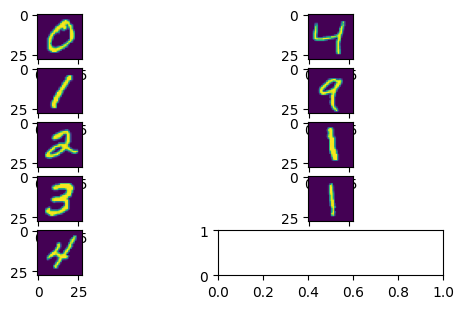

In [ ]:
for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
batch_size=32
num_classes=10
epochs=10

In [ ]:
def build_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

Training with optimizer: SGD


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8586 - loss: 0.4644
Epoch 1: val_accuracy improved from -inf to 0.98030, saving model to temp_best_model_SGD.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8586 - loss: 0.4643 - val_accuracy: 0.9803 - val_loss: 0.0604
Epoch 2/10
1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9703 - loss: 0.1048
Epoch 2: val_accuracy improved from 0.98030 to 0.98590, saving model to temp_best_model_SGD.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9703 - loss: 0.1047 - val_accuracy: 0.9859 - val_loss: 0.0445
Epoch 3/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.0759
Epoch 3: val_accuracy improved from 0.98590 to 0.98820, saving model to temp_best_model_SGD.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0759 - val_accuracy: 0.9882 - val_loss: 0.0364
Epoch 4/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9821 - loss: 0.0598


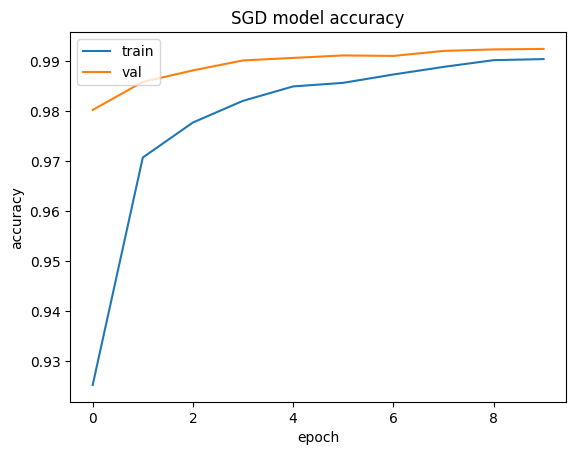

Training with optimizer: Adadelta


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1389 - loss: 3.7774
Epoch 1: val_accuracy improved from -inf to 0.57610, saving model to temp_best_model_Adadelta.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1391 - loss: 3.7741 - val_accuracy: 0.5761 - val_loss: 1.4126
Epoch 2/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4028 - loss: 1.7664
Epoch 2: val_accuracy improved from 0.57610 to 0.75240, saving model to temp_best_model_Adadelta.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4030 - loss: 1.7658 - val_accuracy: 0.7524 - val_loss: 0.9411
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5806 - loss: 1.2588
Epoch 3: val_accuracy improved from 0.75240 to 0.82320, saving model to temp_best_model_Adadelta.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5806 - loss: 1.2588 - val_accuracy: 0.8232 - val_loss: 0.7072
Epoch 4/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.669

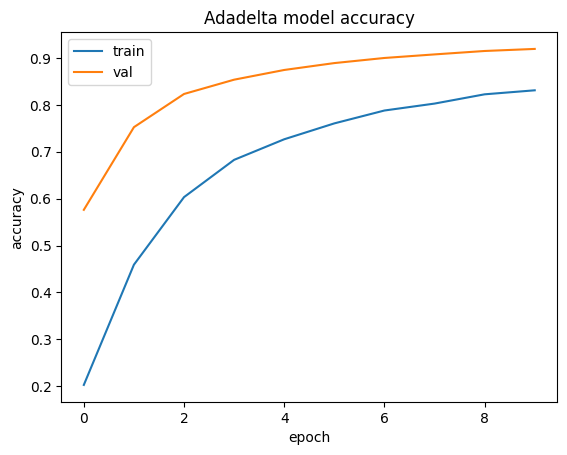

Training with optimizer: Adagrad


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7817 - loss: 0.7051
Epoch 1: val_accuracy improved from -inf to 0.96530, saving model to temp_best_model_Adagrad.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7820 - loss: 0.7040 - val_accuracy: 0.9653 - val_loss: 0.1215
Epoch 2/10
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.2188
Epoch 2: val_accuracy improved from 0.96530 to 0.97130, saving model to temp_best_model_Adagrad.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9335 - loss: 0.2187 - val_accuracy: 0.9713 - val_loss: 0.0903
Epoch 3/10
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9506 - loss: 0.1680
Epoch 3: val_accuracy improved from 0.97130 to 0.97620, saving model to temp_best_model_Adagrad.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9507 - loss: 0.1680 - val_accuracy: 0.9762 - val_loss: 0.0756
Epoch 4/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9577 - l

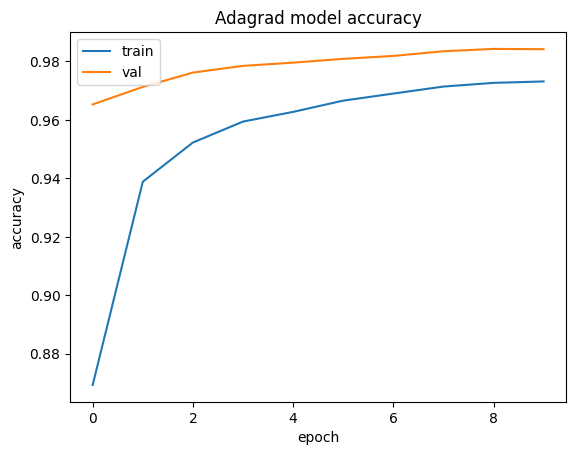

Training with optimizer: Adam


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8733 - loss: 0.4235
Epoch 1: val_accuracy improved from -inf to 0.98470, saving model to temp_best_model_Adam.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8735 - loss: 0.4229 - val_accuracy: 0.9847 - val_loss: 0.0474
Epoch 2/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9670 - loss: 0.1133
Epoch 2: val_accuracy improved from 0.98470 to 0.98670, saving model to temp_best_model_Adam.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9670 - loss: 0.1133 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 3/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0881
Epoch 3: val_accuracy improved from 0.98670 to 0.98710, saving model to temp_best_model_Adam.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9760 - loss: 0.0881 - val_accuracy: 0.9871 - val_loss: 0.0419
Epoch 4/10
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0

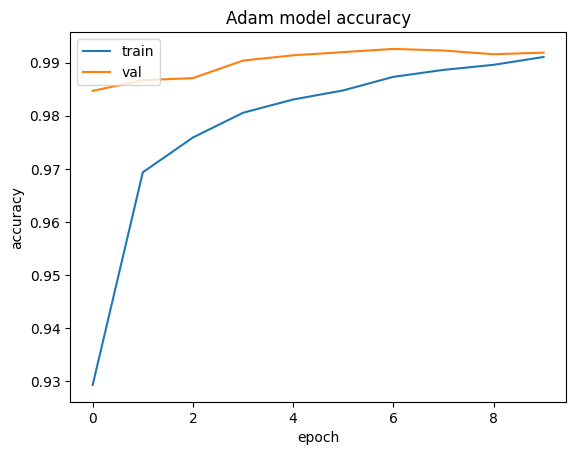

Training with optimizer: RMSprop


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 0.4739
Epoch 1: val_accuracy improved from -inf to 0.98580, saving model to temp_best_model_RMSprop.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8820 - loss: 0.4717 - val_accuracy: 0.9858 - val_loss: 0.0574
Epoch 2/10
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1326
Epoch 2: val_accuracy did not improve from 0.98580
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9681 - loss: 0.1325 - val_accuracy: 0.9833 - val_loss: 0.0684
Epoch 3/10
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9748 - loss: 0.1126
Epoch 3: val_accuracy improved from 0.98580 to 0.98680, saving model to temp_best_model_RMSprop.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9748 - loss: 0.1127 - val_accuracy: 0.9868 - val_loss: 0.0667
Epoch 4/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9771 - loss: 0.1078
Epoch 4: val_accuracy did not improve

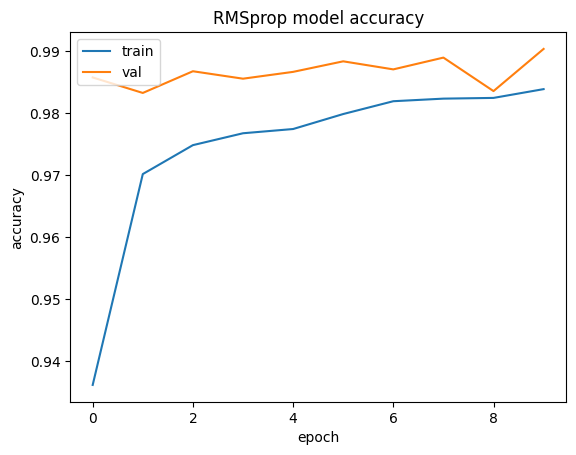

Best model saved as best_model_Adam.keras


In [ ]:
optimizer_list = ['SGD', 'Adadelta', 'Adagrad', 'Adam', 'RMSprop']
best_val_accuracy = 0.0
best_model_filename = None

for idx, optimizer_name in enumerate(optimizer_list):
    print(f"Training with optimizer: {optimizer_name}")

    model = build_model(optimizer_name)

    plot_model(model, to_file=f"mnist_model_{optimizer_name}.jpg", show_shapes=True)

    checkpoint_callback = ModelCheckpoint(
        filepath=f"temp_best_model_{optimizer_name}.keras",
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )

    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                     validation_data=(x_test, y_test), callbacks=[checkpoint_callback])

    current_best_val_accuracy = max(hist.history['val_accuracy'])
    if current_best_val_accuracy > best_val_accuracy:
        best_val_accuracy = current_best_val_accuracy
        best_model_filename = f"best_model_{optimizer_name}.keras"
        if os.path.exists(best_model_filename):
            os.remove(best_model_filename)
        os.rename(f"temp_best_model_{optimizer_name}.keras", best_model_filename)

    plt.figure()
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title(f'{optimizer_name} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

if best_model_filename:
    print(f"Best model saved as {best_model_filename}")
else:
    print("No model was saved.")

In [ ]:
def predict_image(model, img):
  img = np.reshape(img,(1, 28, 28))
  pred = model.predict(img)
  img = img.astype('float32')
  img /=255
  print(pred)
  answer = np.argmax(pred)
  print(answer)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)

--------------SGD--------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
[[1.1447925e-07 1.5961747e-08 3.1008671e-08 1.4095982e-05 5.9101461e-05
  8.9263394e-06 7.0547185e-10 1.4455264e-08 2.3925115e-04 9.9967843e-01]]
9


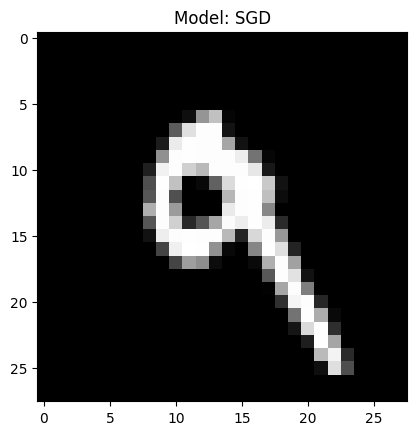

--------------Adadelta--------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
[[0.00116178 0.0045874  0.02794611 0.01504851 0.38064063 0.01566214
  0.00614331 0.04370518 0.04677676 0.45832825]]
9


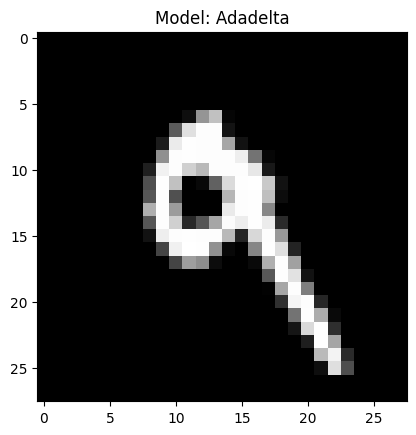

--------------Adagrad--------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
[[2.4828783e-05 5.0110609e-04 1.2333744e-04 6.8133158e-05 1.7659074e-02
  1.6256846e-03 2.0560232e-04 4.0631436e-05 4.4720634e-03 9.7527963e-01]]
9


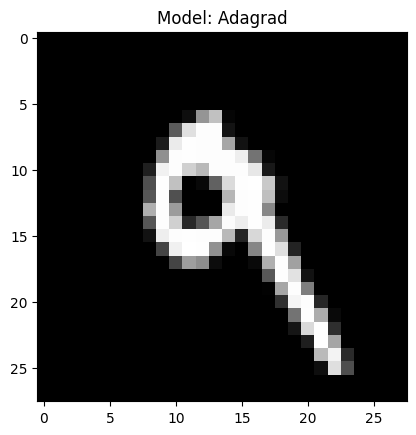

--------------Adam--------------
--------------RMSprop--------------


In [ ]:
for optimizer in optimizer_list:
    print("--------------" + optimizer + "--------------")

    model_filename = f'/content/{optimizer} mnist.h5'

    if os.path.exists(model_filename):
        try:
            m = load_model(model_filename)
            predict_image(m, x_test[7])
            plt.imshow(x_test[7], cmap='gray')
            plt.title(f'Model: {optimizer}')
            plt.show()
        except Exception as e:
            print(f"Error loading model {optimizer}: {e}")
    else:
        pass

In [ ]:
import tensorflow as tf

In [ ]:
p_test = model.predict(x_test)

print("Shape of predictions:", p_test.shape)

predicted_classes = tf.argmax(p_test, axis=1)
print("Shape of predicted classes:", predicted_classes.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of predictions: (10000, 10)
Shape of predicted classes: (10000,)


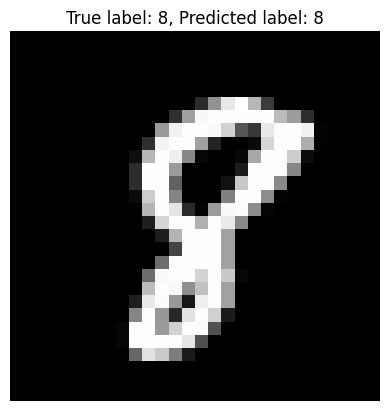

In [ ]:
predicted_classes = np.argmax(p_test, axis=1)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

crr_indices = np.where(predicted_classes == y_test_classes)[0]

if len(crr_indices) > 0:
    random_index = np.random.choice(crr_indices)
    plt.imshow(x_test[random_index], cmap='gray')
    plt.title(f"True label: {y_test_classes[random_index]}, Predicted label: {predicted_classes[random_index]}")
    plt.axis('off')
    plt.show()
else:
    print("No correct predictions found.")

*Conclusion :*  <br>
In this experiment, we evaluated various optimizers—SGD, Adadelta, Adagrad, Adam, and RMSprop—on a CNN model trained with the MNIST dataset. The findings highlighted that optimizers like Adam typically offered better performance in terms of accuracy and training speed compared to others. We also implemented a strategy to save only the best-performing model, which helped manage our results more effectively.